In [1]:
import pandas as pd
import numpy as np

import os
import sys
import re
import random

# %load_ext autoreload
# %autoreload 2
import os, sys
if os.path.abspath('../lib') not in sys.path:
    sys.path.insert(0, os.path.abspath('../lib'))
import custom_util as util

import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)


In [2]:
base_dir = os.path.split(os.getcwd())[0]
base_dir


'c:\\Users\\WHNP83\\Documents\\GitHub\\major-project'

In [3]:
Ravdess = os.path.join(base_dir, 'data', 'ravdess')
print(Ravdess)

Crema = os.path.join(base_dir, 'data', 'crema', 'AudioWAV')
print(Crema)
crema_emotions = {
    'NEU': 'neutral',
    'HAP': 'happy',
    'SAD': 'sad',
    'ANG': 'angry',
    'FEA': 'fear',
    'DIS': 'disgust'
}

Savee = os.path.join(base_dir, 'data', 'surrey', 'ALL')
print(Savee)
savee_emotions = {
    'n': 'neutral',
    'h': 'happy',
    'sa': 'sad',
    'su': 'surprise',
    'a': 'angry',
    'f': 'fear',
    'd': 'disgust'
}

Tess = os.path.join(base_dir, 'data', 'tess', 'TESS Toronto emotional speech set data')
print(Tess)


c:\Users\WHNP83\Documents\GitHub\major-project\data\ravdess
c:\Users\WHNP83\Documents\GitHub\major-project\data\crema\AudioWAV
c:\Users\WHNP83\Documents\GitHub\major-project\data\surrey\ALL
c:\Users\WHNP83\Documents\GitHub\major-project\data\tess\TESS Toronto emotional speech set data


## CREMA
___

In [4]:
crema_directory_list = os.listdir(Crema)
file_emotion = []
file_path = []

for file in crema_directory_list:
    # storing file paths
    file_path.append(os.path.join(Crema, file))
    emotion = file.split('_')[2]
    if emotion in crema_emotions:
        file_emotion.append(crema_emotions[emotion])
    else:
        file_emotion.append('Unknown')

# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Crema_df = pd.concat([emotion_df, path_df], axis=1)
Crema_df


Emotions                                               Path
0       angry  c:\Users\WHNP83\Documents\GitHub\major-project...
1     disgust  c:\Users\WHNP83\Documents\GitHub\major-project...
2        fear  c:\Users\WHNP83\Documents\GitHub\major-project...
3       happy  c:\Users\WHNP83\Documents\GitHub\major-project...
4     neutral  c:\Users\WHNP83\Documents\GitHub\major-project...
...       ...                                                ...
7472  disgust  c:\Users\WHNP83\Documents\GitHub\major-project...
7473     fear  c:\Users\WHNP83\Documents\GitHub\major-project...
7474    happy  c:\Users\WHNP83\Documents\GitHub\major-project...
7475  neutral  c:\Users\WHNP83\Documents\GitHub\major-project...
7476      sad  c:\Users\WHNP83\Documents\GitHub\major-project...

[7477 rows x 2 columns]

``` The first audio file in the dataset CREMA ```

In [5]:
util.get_audio_by_index(Crema_df, 0)


c:\Users\WHNP83\Documents\GitHub\major-project\data\crema\AudioWAV\1001_DFA_ANG_XX.wav


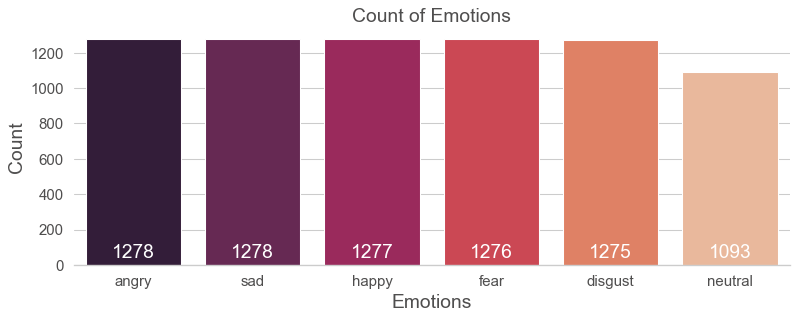

In [6]:
util.print_emotion_count(Crema_df)


https://blog.dataiku.com/speech-emotion-recognition-deep-learning#:~:text=We%20are%20going%20to%20explore%20a%20speech%20emotion,Let%E2%80%99s%20start%20by%20uploading%20the%20dataset%20in%20Dataiku.

https://www.kaggle.com/code/ashishpatel26/feature-extraction-from-audio

https://devopedia.org/audio-feature-extraction

https://www.kaggle.com/code/shivamburnwal/speech-emotion-recognition

## TESS
___

In [7]:
tess_directory_list = os.listdir(Tess)

file_emotion = []
file_path = []

for dir in tess_directory_list:
    directories = os.listdir(os.path.join(Tess, dir))
    for file in directories:

        part = file.split('.')[0]
        part = part.split('_')[2]

        if part == 'ps':
            file_emotion.append('surprise')
        elif part == 'happy(1)':
            file_emotion.append('happy')
        else:
            file_emotion.append(part)
        file_path.append(os.path.join(Tess, dir, file))

# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Tess_df = pd.concat([emotion_df, path_df], axis=1)
Tess_df


Emotions                                               Path
0       angry  c:\Users\WHNP83\Documents\GitHub\major-project...
1       angry  c:\Users\WHNP83\Documents\GitHub\major-project...
2       angry  c:\Users\WHNP83\Documents\GitHub\major-project...
3       angry  c:\Users\WHNP83\Documents\GitHub\major-project...
4       angry  c:\Users\WHNP83\Documents\GitHub\major-project...
...       ...                                                ...
2805      sad  c:\Users\WHNP83\Documents\GitHub\major-project...
2806      sad  c:\Users\WHNP83\Documents\GitHub\major-project...
2807      sad  c:\Users\WHNP83\Documents\GitHub\major-project...
2808      sad  c:\Users\WHNP83\Documents\GitHub\major-project...
2809      sad  c:\Users\WHNP83\Documents\GitHub\major-project...

[2810 rows x 2 columns]

``` The first audio file found in the dataset TESS ```

In [8]:
util.get_audio_by_index(Tess_df, 0)


c:\Users\WHNP83\Documents\GitHub\major-project\data\tess\TESS Toronto emotional speech set data\OAF_angry\OAF_back_angry.wav


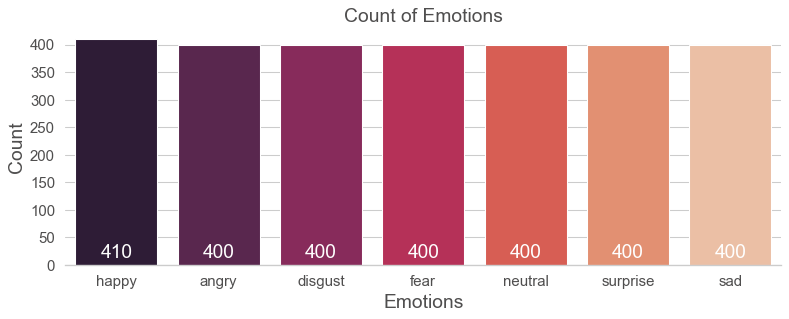

In [9]:
util.print_emotion_count(Tess_df)


## RAVDESS
___

In [10]:
ravdess_directory_list = os.listdir(Ravdess)

file_emotion = []
file_path = []
for dir in ravdess_directory_list:
    # as their are 20 different actors in our previous directory we need to extract files for each actor.
    actor = os.listdir(os.path.join(Ravdess, dir))
    for file in actor:
        part = file.split('.')[0]
        part = part.split('-')
        # third part in each file represents the emotion associated to that file.
        file_emotion.append(int(part[2]))
        file_path.append(os.path.join(Ravdess, dir, file))

# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Ravdess_df = pd.concat([emotion_df, path_df], axis=1)

# changing integers to actual emotions.
Ravdess_df.Emotions.replace(
    {
        1: 'neutral',
        2: 'calm',
        3: 'happy',
        4: 'sad',
        5: 'angry',
        6: 'fear',
        7: 'disgust',
        8: 'surprise'
    },
    inplace=True)

Ravdess_df


Emotions                                               Path
0      neutral  c:\Users\WHNP83\Documents\GitHub\major-project...
1      neutral  c:\Users\WHNP83\Documents\GitHub\major-project...
2      neutral  c:\Users\WHNP83\Documents\GitHub\major-project...
3      neutral  c:\Users\WHNP83\Documents\GitHub\major-project...
4         calm  c:\Users\WHNP83\Documents\GitHub\major-project...
...        ...                                                ...
1435  surprise  c:\Users\WHNP83\Documents\GitHub\major-project...
1436  surprise  c:\Users\WHNP83\Documents\GitHub\major-project...
1437  surprise  c:\Users\WHNP83\Documents\GitHub\major-project...
1438  surprise  c:\Users\WHNP83\Documents\GitHub\major-project...
1439  surprise  c:\Users\WHNP83\Documents\GitHub\major-project...

[1440 rows x 2 columns]

``` The first audio file found in the dataset RAVDESS ```

In [11]:
util.get_audio_by_index(Ravdess_df, 0)


c:\Users\WHNP83\Documents\GitHub\major-project\data\ravdess\Actor_01\03-01-01-01-01-01-01.wav


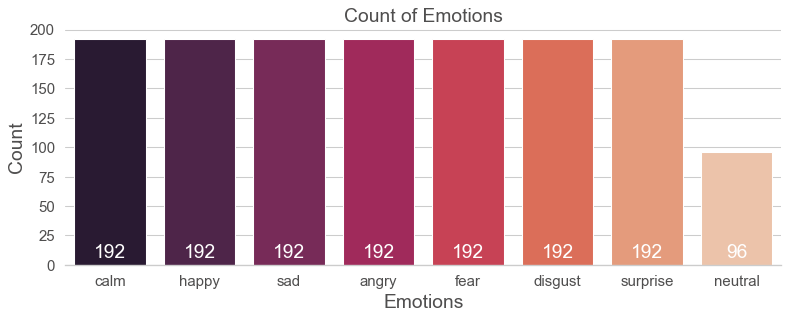

In [12]:
util.print_emotion_count(Ravdess_df)


## SAVEE
___

In [13]:
savee_directory_list = os.listdir(Savee)
file_emotion = []
file_path = []

for file in savee_directory_list:
    file_path.append(os.path.join(Savee, file))
    file_emotion.append(savee_emotions[re.search(r'\w\w_(\w+)\d\d', file)[1]])

# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Savee_df = pd.concat([emotion_df, path_df], axis=1)
Savee_df


Emotions                                               Path
0       angry  c:\Users\WHNP83\Documents\GitHub\major-project...
1       angry  c:\Users\WHNP83\Documents\GitHub\major-project...
2       angry  c:\Users\WHNP83\Documents\GitHub\major-project...
3       angry  c:\Users\WHNP83\Documents\GitHub\major-project...
4       angry  c:\Users\WHNP83\Documents\GitHub\major-project...
..        ...                                                ...
475  surprise  c:\Users\WHNP83\Documents\GitHub\major-project...
476  surprise  c:\Users\WHNP83\Documents\GitHub\major-project...
477  surprise  c:\Users\WHNP83\Documents\GitHub\major-project...
478  surprise  c:\Users\WHNP83\Documents\GitHub\major-project...
479  surprise  c:\Users\WHNP83\Documents\GitHub\major-project...

[480 rows x 2 columns]

``` The first audio file found in the dataset SAVEE ```

In [14]:
util.get_audio_by_index(Savee_df, 0)


c:\Users\WHNP83\Documents\GitHub\major-project\data\surrey\ALL\DC_a01.wav


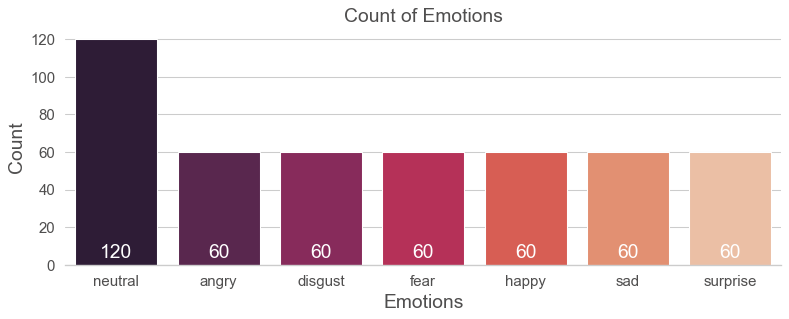

In [15]:
util.print_emotion_count(Savee_df)


___
## Data Visualisation and Exploration

In [16]:
# combining all datasets into one
data_path = pd.concat([Crema_df, Tess_df, Ravdess_df, Savee_df], axis=0)
data_path.to_csv(os.path.join(os.path.abspath('..'), 'data', 'data_path.csv'), index=False)
data_path


Emotions                                               Path
0       angry  c:\Users\WHNP83\Documents\GitHub\major-project...
1     disgust  c:\Users\WHNP83\Documents\GitHub\major-project...
2        fear  c:\Users\WHNP83\Documents\GitHub\major-project...
3       happy  c:\Users\WHNP83\Documents\GitHub\major-project...
4     neutral  c:\Users\WHNP83\Documents\GitHub\major-project...
..        ...                                                ...
475  surprise  c:\Users\WHNP83\Documents\GitHub\major-project...
476  surprise  c:\Users\WHNP83\Documents\GitHub\major-project...
477  surprise  c:\Users\WHNP83\Documents\GitHub\major-project...
478  surprise  c:\Users\WHNP83\Documents\GitHub\major-project...
479  surprise  c:\Users\WHNP83\Documents\GitHub\major-project...

[12207 rows x 2 columns]

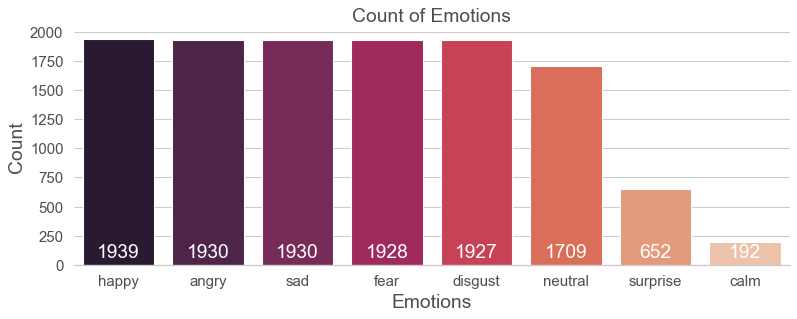

In [17]:
util.print_emotion_count(data_path)


c:\Users\WHNP83\Documents\GitHub\major-project\data\crema\AudioWAV\1001_DFA_HAP_XX.wav


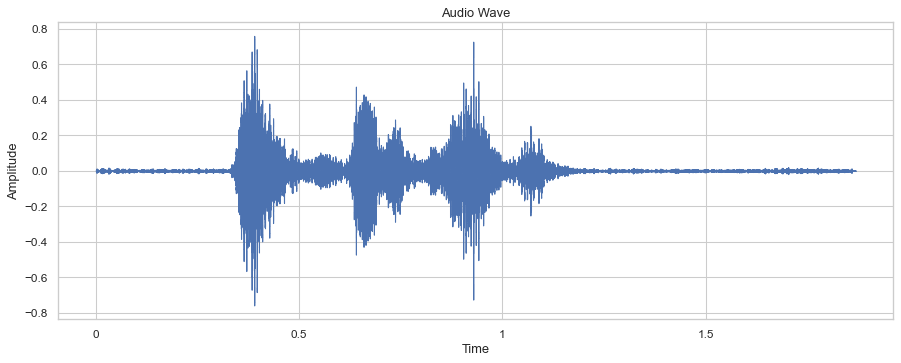

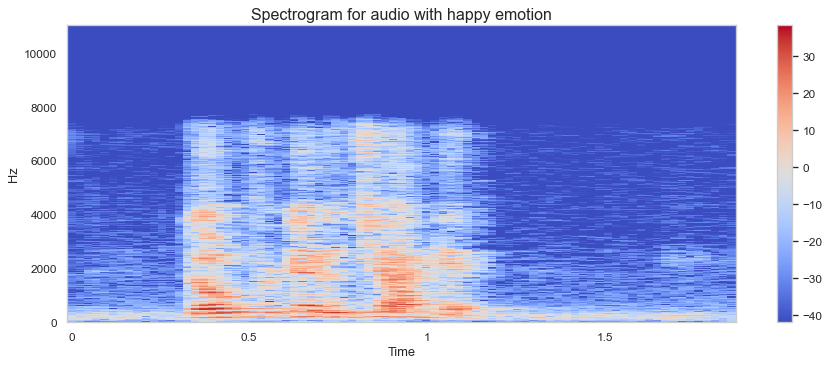

In [18]:
util.get_audio(data_path, 'happy')
util.create_waveplot(data_path, 'happy')
util.create_spectrogram(data_path, 'happy')


c:\Users\WHNP83\Documents\GitHub\major-project\data\crema\AudioWAV\1001_DFA_ANG_XX.wav


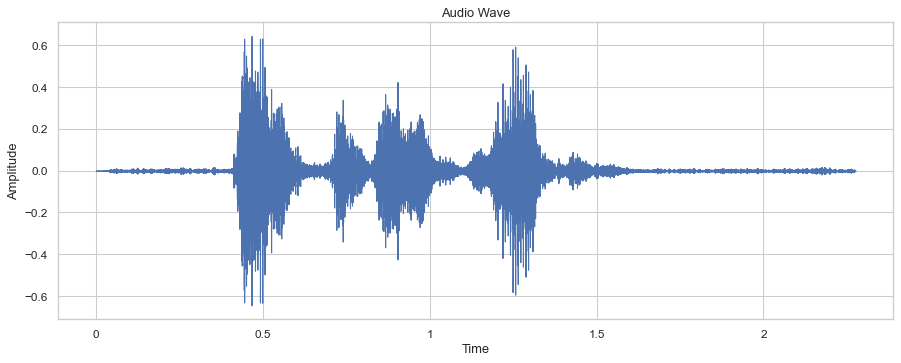

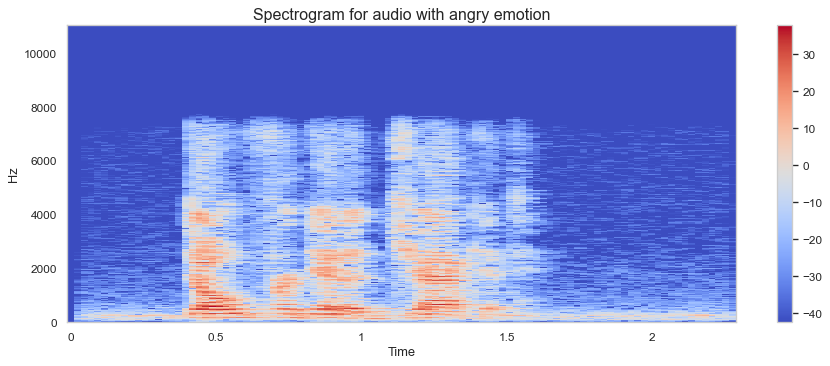

In [19]:
util.get_audio(data_path, 'angry')
util.create_waveplot(data_path, 'angry')
util.create_spectrogram(data_path, 'angry')


c:\Users\WHNP83\Documents\GitHub\major-project\data\crema\AudioWAV\1001_DFA_SAD_XX.wav


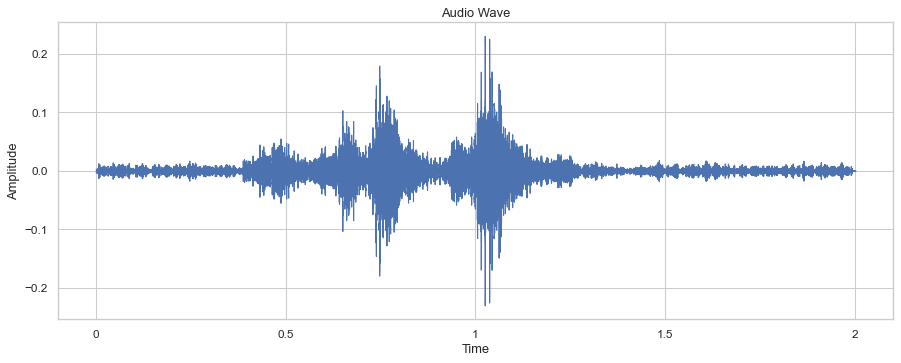

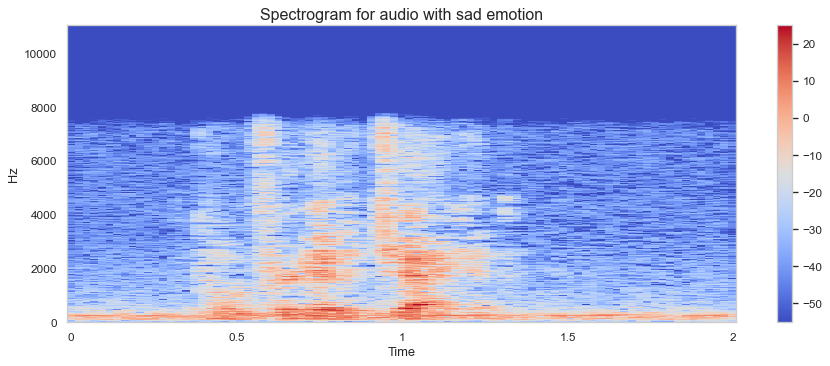

In [20]:
util.get_audio(data_path, 'sad')
util.create_waveplot(data_path, 'sad')
util.create_spectrogram(data_path, 'sad')


c:\Users\WHNP83\Documents\GitHub\major-project\data\crema\AudioWAV\1001_DFA_FEA_XX.wav


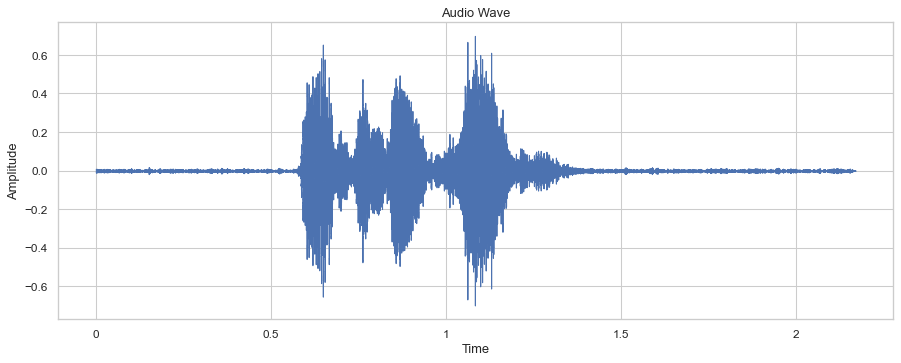

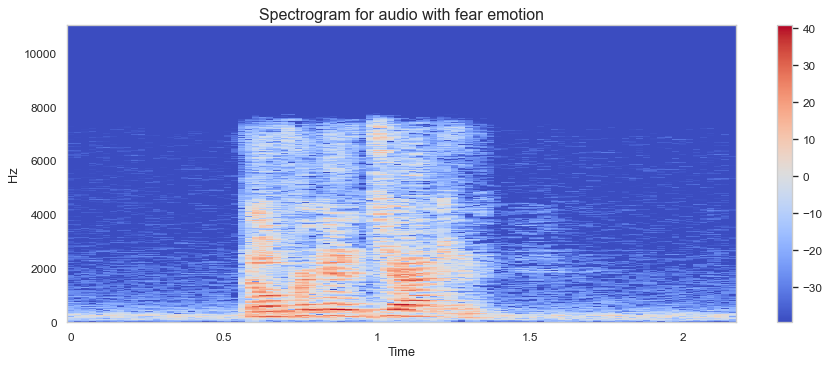

In [21]:
util.get_audio(data_path, 'fear')
util.create_waveplot(data_path, 'fear')
util.create_spectrogram(data_path, 'fear')


c:\Users\WHNP83\Documents\GitHub\major-project\data\crema\AudioWAV\1001_DFA_DIS_XX.wav


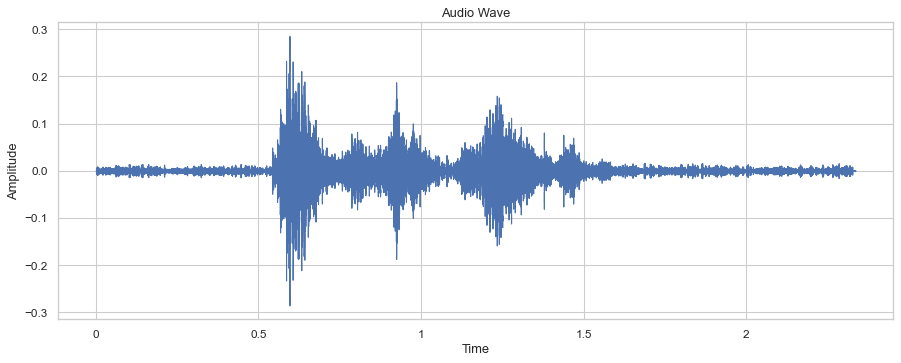

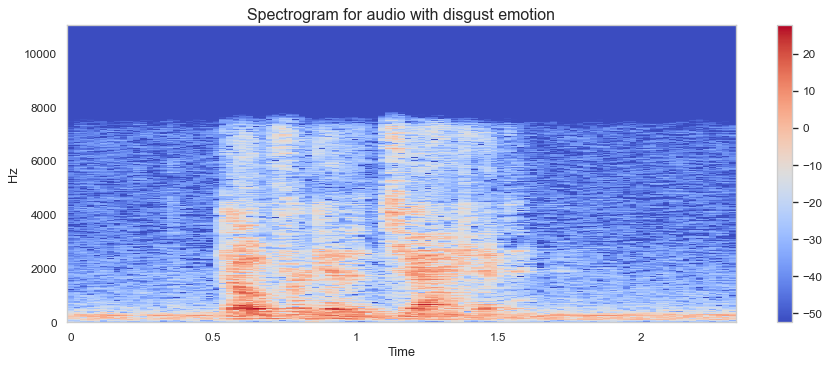

In [22]:
util.get_audio(data_path, 'disgust')
util.create_waveplot(data_path, 'disgust')
util.create_spectrogram(data_path, 'disgust')


c:\Users\WHNP83\Documents\GitHub\major-project\data\crema\AudioWAV\1001_DFA_NEU_XX.wav


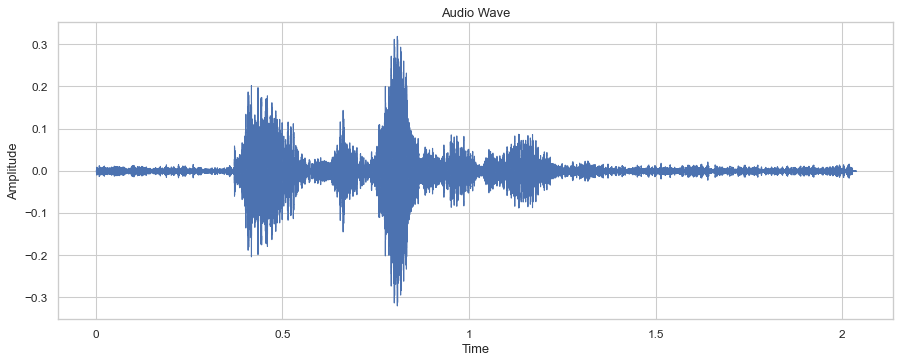

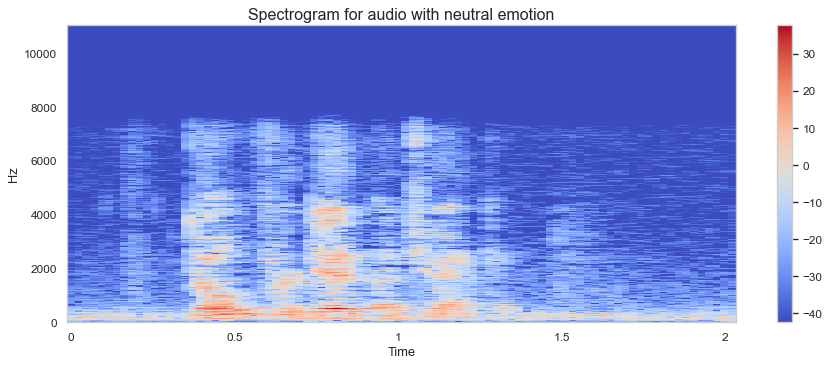

In [23]:
util.get_audio(data_path, 'neutral')
util.create_waveplot(data_path, 'neutral')
util.create_spectrogram(data_path, 'neutral')


c:\Users\WHNP83\Documents\GitHub\major-project\data\tess\TESS Toronto emotional speech set data\OAF_Pleasant_surprise\OAF_back_ps.wav


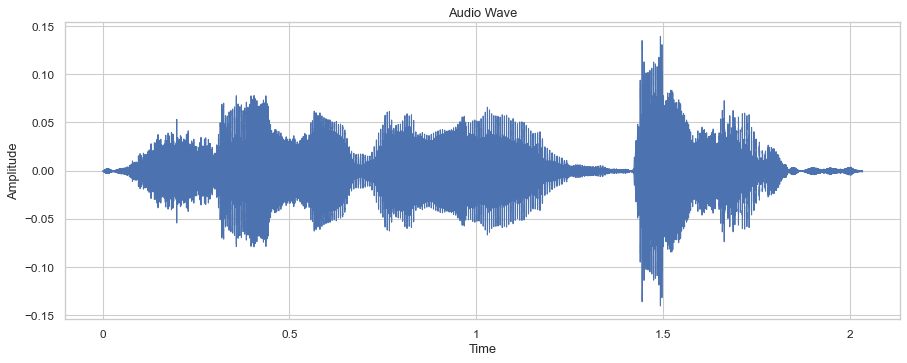

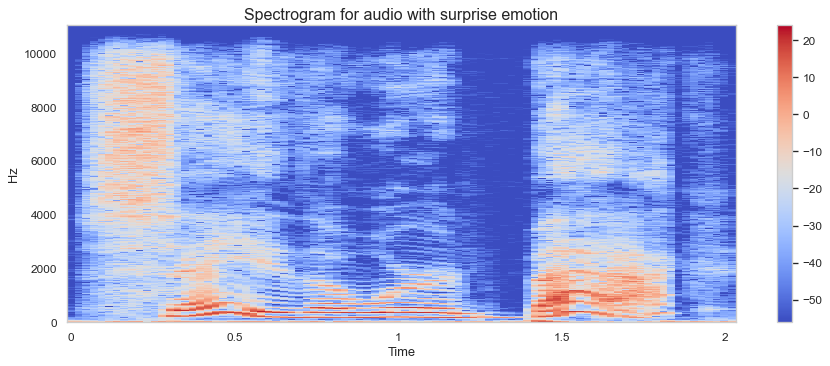

In [24]:
util.get_audio(data_path, 'surprise')
util.create_waveplot(data_path, 'surprise')
util.create_spectrogram(data_path, 'surprise')


c:\Users\WHNP83\Documents\GitHub\major-project\data\ravdess\Actor_01\03-01-02-01-01-01-01.wav


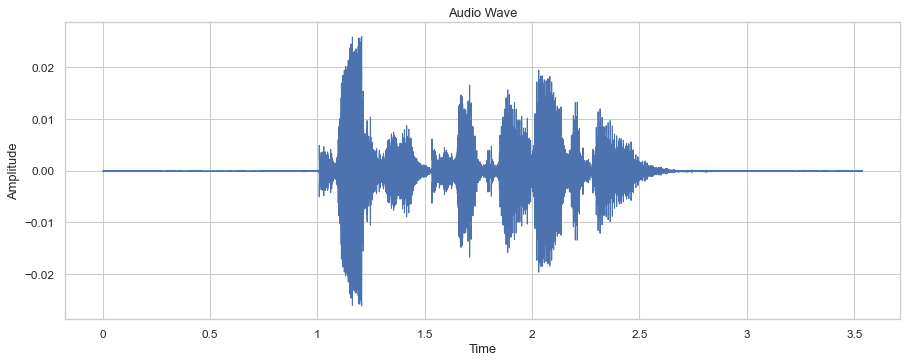

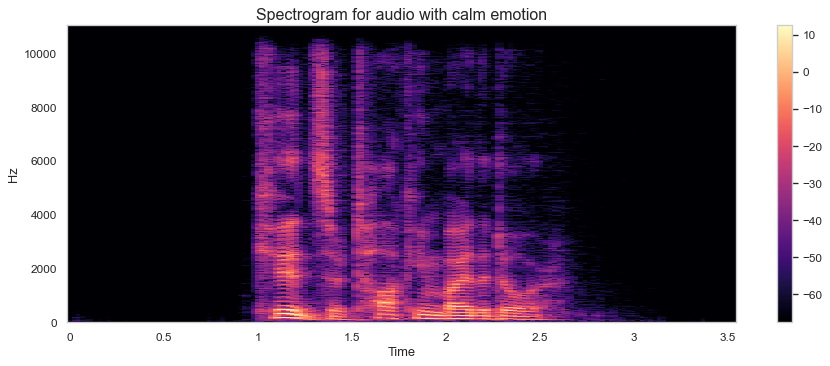

In [25]:
util.get_audio(data_path, 'calm')
util.create_waveplot(data_path, 'calm')
util.create_spectrogram(data_path, 'calm')


___
## Exploring techniques that modify Audio

c:\Users\WHNP83\Documents\GitHub\major-project\data\crema\AudioWAV\1040_IEO_SAD_LO.wav


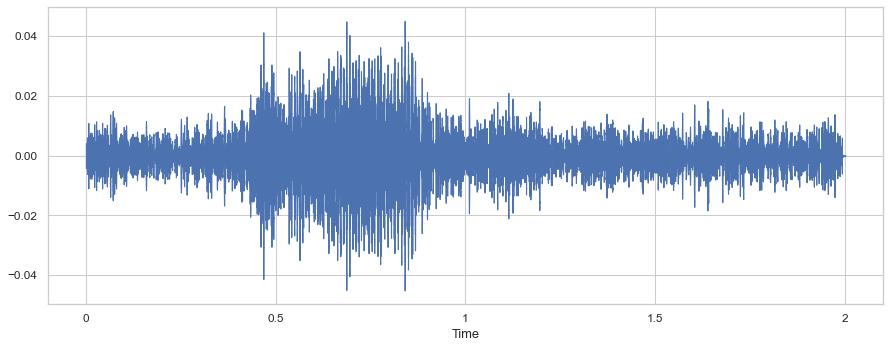

In [26]:
# taking any example and checking for techniques.
path = np.array(data_path.Path)[random.randint(0, len(data_path) - 1)]
print(path)

# displaying the original audio file
util.display_audio(path)


### NOISE

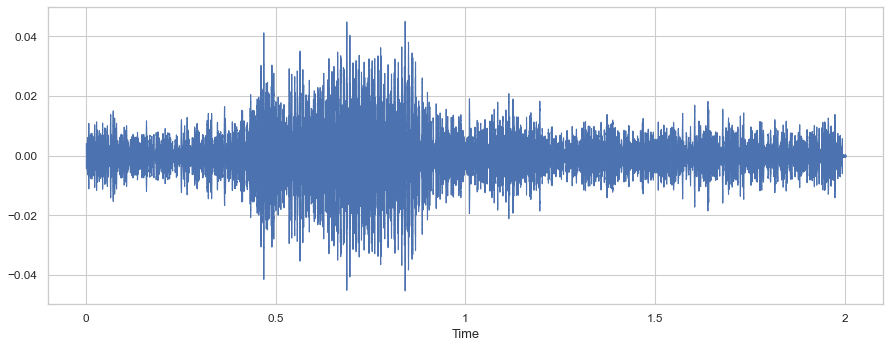

In [27]:
x = util.noise(path)
util.display_audio(x)


### STRETCH

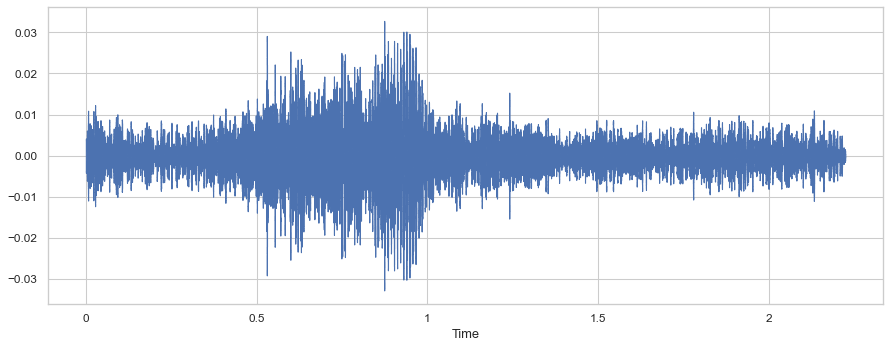

In [28]:
x = util.stretch(path)
util.display_audio(x)


### SHIFT

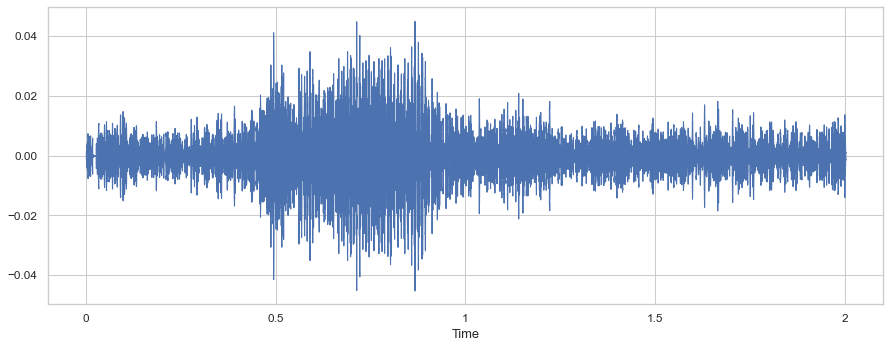

In [29]:
# shift
x = util.shift(path)
util.display_audio(x)


### PITCH

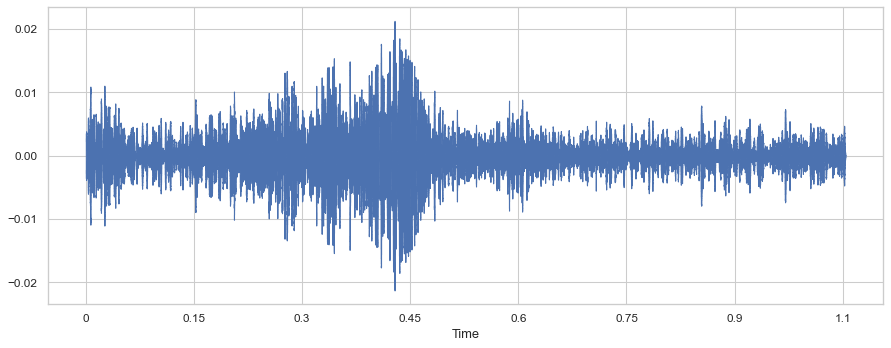

In [30]:
# pitch
x = util.pitch(path)
util.display_audio(x)
